In [6]:
import os
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import itertools
import os
import sys
import json
from matplotlib.collections import LineCollection
import lmfit

# from clustering_scripts import *

In [7]:
DATADIR = "../data/"
FIGDIR = "../img/"

In [15]:
with h5py.File(os.path.join(DATADIR, "amplitude_b1_worst_zeta_avg.h5"), "r") as f:
    x0 = f["reference/initial/x_norm"][:]
    px0 = f["reference/initial/px_norm"][:]
    y0 = f["reference/initial/y_norm"][:]
    py0 = f["reference/initial/py_norm"][:]
    zeta0 = f["reference/initial/zeta_norm"][:]
    pzeta0 = f["reference/initial/pzeta_norm"][:]

    amplitude0 = np.sqrt(x0 ** 2 + px0 ** 2 + y0 ** 2 + py0 ** 2 + zeta0 ** 2 + pzeta0 ** 2)

    times = list(sorted([int(s) for s in f["track/x_norm/"].keys()]))

    x = np.array([f["track/x_norm/{}/".format(t)][:] for t in times])
    px = np.array([f["track/px_norm/{}/".format(t)][:] for t in times])
    y = np.array([f["track/y_norm/{}/".format(t)][:] for t in times])
    py = np.array([f["track/py_norm/{}/".format(t)][:] for t in times])
    zeta = np.array([f["track/zeta_norm/{}/".format(t)][:] for t in times])
    pzeta = np.array([f["track/pzeta_norm/{}/".format(t)][:] for t in times])

    amplitude = np.sqrt(x ** 2 + px ** 2 + y ** 2 + py ** 2 + zeta ** 2 + pzeta ** 2)

In [16]:
np.isclose(np.ones(10)+1, 1)

array([False, False, False, False, False, False, False, False, False,
       False])

4.4720912660369836e-09
4.472091285373986e-09
4.4720913364645025e-09
4.472091168653673e-09
4.4720915191170246e-09
4.472091381295968e-09
4.472091633161278e-09
4.472091515899233e-09
4.472091544308457e-09
4.472091576718866e-09


Text(0.5, 1.0, 'alive')

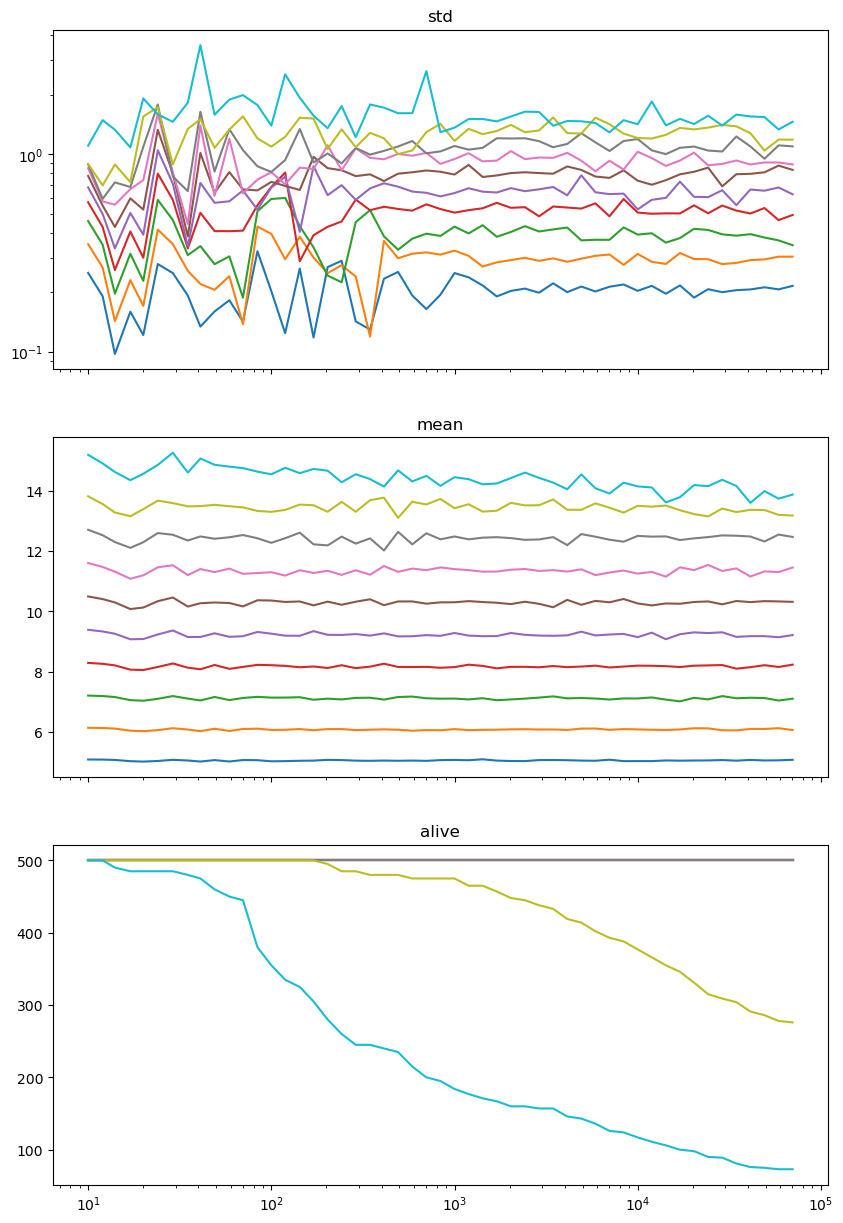

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for i in range(5, 15):
    mask = np.isclose(amplitude0, i, atol=1e-6)

    std = np.nanstd(amplitude[:, mask], axis=1)
    mean = np.nanmean(amplitude[:, mask], axis=1)
    not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

    print(np.nanstd(amplitude0[mask]))

    axs[0].plot(times, std)
    axs[1].plot(times, mean)
    axs[2].plot(times, not_nan)

axs[1].set_xscale("log")
axs[0].set_yscale("log")

axs[0].set_title("std")
axs[1].set_title("mean")
axs[2].set_title("alive")

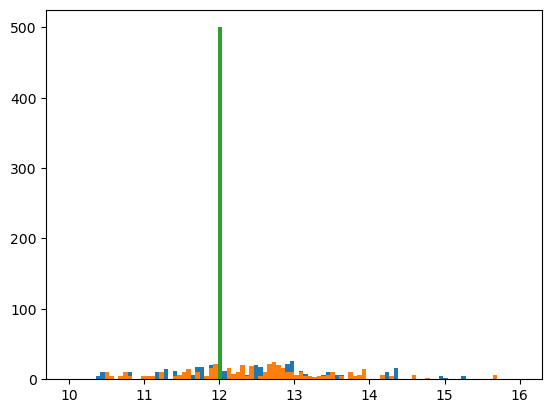

In [30]:
mask = np.isclose(amplitude0, 12, atol=1e-6)

std = np.nanstd(amplitude[:, mask], axis=1)
mean = np.nanmean(amplitude[:, mask], axis=1)
not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

plt.hist(amplitude[-1, mask], bins=100, range=(10, 16));
plt.hist(amplitude[-10, mask], bins=100, range=(10, 16));
plt.hist(amplitude0[mask], bins=100, range=(10, 16));

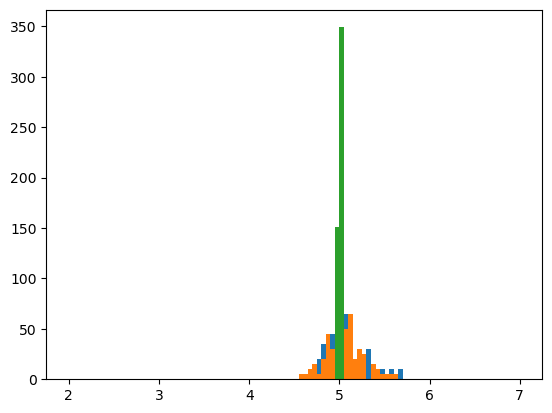

In [32]:
mask = np.isclose(amplitude0, 5, atol=1e-6)

std = np.nanstd(amplitude[:, mask], axis=1)
mean = np.nanmean(amplitude[:, mask], axis=1)
not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

plt.hist(amplitude[-1, mask], bins=100, range=(2, 7));
plt.hist(amplitude[-10, mask], bins=100, range=(2,7));
plt.hist(amplitude0[mask], bins=100, range=(2,7));

In [35]:
np.logspace(1, 4, 200, dtype=int)

array([   10,    10,    10,    11,    11,    11,    12,    12,    13,
          13,    14,    14,    15,    15,    16,    16,    17,    18,
          18,    19,    20,    20,    21,    22,    23,    23,    24,
          25,    26,    27,    28,    29,    30,    31,    32,    33,
          34,    36,    37,    38,    40,    41,    42,    44,    46,
          47,    49,    51,    52,    54,    56,    58,    60,    62,
          65,    67,    69,    72,    74,    77,    80,    83,    86,
          89,    92,    95,    98,   102,   105,   109,   113,   117,
         121,   126,   130,   135,   139,   144,   149,   155,   160,
         166,   172,   178,   184,   191,   197,   204,   212,   219,
         227,   235,   243,   252,   261,   270,   280,   289,   300,
         310,   321,   333,   344,   357,   369,   382,   396,   410,
         424,   439,   455,   471,   488,   505,   523,   541,   560,
         580,   601,   622,   644,   666,   690,   714,   740,   766,
         793,   821,

In [51]:
with h5py.File(os.path.join(DATADIR, "amplitude_2_b1_worst_zeta_avg.h5"), "r") as f:
    x0 = f["reference/initial/x_norm"][:]
    px0 = f["reference/initial/px_norm"][:]
    y0 = f["reference/initial/y_norm"][:]
    py0 = f["reference/initial/py_norm"][:]
    zeta0 = f["reference/initial/zeta_norm"][:]
    pzeta0 = f["reference/initial/pzeta_norm"][:]

    amplitude0 = np.sqrt(x0 ** 2 + px0 ** 2 + y0 ** 2 + py0 ** 2 + zeta0 ** 2 + pzeta0 ** 2)

    times = list(sorted([int(s) for s in f["track/x_norm/"].keys()]))

    x = np.array([f["track/x_norm/{}/".format(t)][:] for t in times])
    px = np.array([f["track/px_norm/{}/".format(t)][:] for t in times])
    y = np.array([f["track/y_norm/{}/".format(t)][:] for t in times])
    py = np.array([f["track/py_norm/{}/".format(t)][:] for t in times])
    zeta = np.array([f["track/zeta_norm/{}/".format(t)][:] for t in times])
    pzeta = np.array([f["track/pzeta_norm/{}/".format(t)][:] for t in times])

    amplitude = np.sqrt(x ** 2 + px ** 2 + y ** 2 + py ** 2 + zeta ** 2 + pzeta ** 2)

I_list = np.linspace(10, 15, 21)

In [52]:
np.isclose(np.ones(10)+1, 1)

array([False, False, False, False, False, False, False, False, False,
       False])

1.8097929380118714e-15
1.9312520187393833e-15
1.9279814795275934e-15
1.7422791863792822e-15
1.840909136494647e-15
1.7495085916501027e-15
1.7513112800125778e-15
1.9507601100048568e-15
1.8374778024090333e-15
1.9539925233402757e-15
1.8613643103193648e-15
2.0867467974864573e-15
1.984437864702065e-15
1.9426555460444656e-15
2.1404915644598175e-15
2.1581090761184557e-15
2.3579422512007565e-15
2.4134930959403947e-15
2.4767281641307726e-15
2.6455195994588317e-15
2.6167370248686402e-15


(1.0, 1.1)

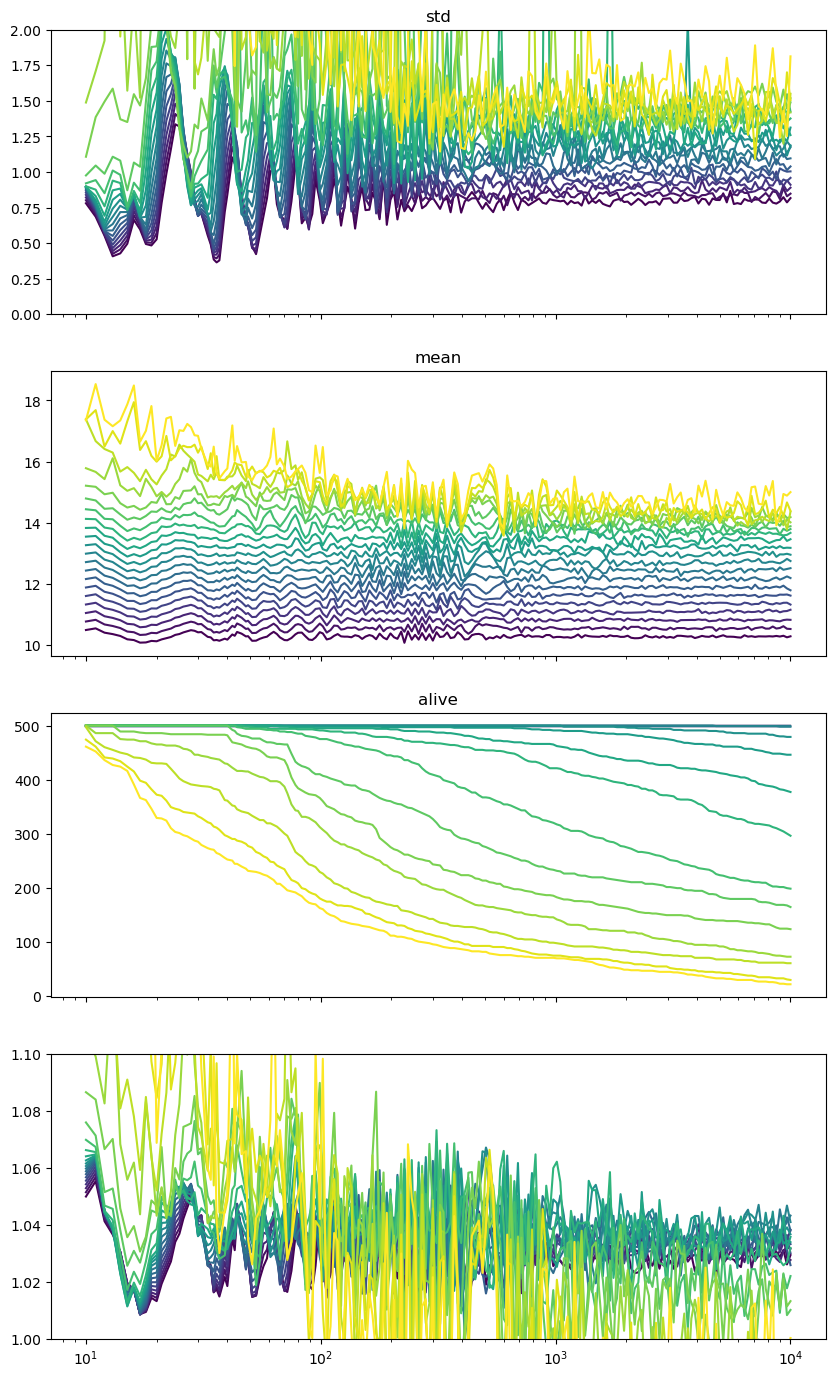

In [85]:
fig, axs = plt.subplots(4, 1, figsize=(10, 17), sharex=True)

colorscale = plt.cm.viridis(np.linspace(0, 1, len(I_list)))

final_std = []
final_mean = []
final_std_err = []
final_mean_err = []
final_alive = []

for i in I_list:
    mask = np.isclose(amplitude0, i, atol=1e-6)

    std = np.nanstd(amplitude[:, mask], axis=1)
    mean = np.nanmean(amplitude[:, mask], axis=1)
    not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

    print(np.nanstd(amplitude0[mask]))

    color = colorscale[np.where(I_list == i)[0][0]]

    axs[0].plot(times, std, color=color)
    axs[1].plot(times, mean, color=color)
    axs[3].plot(times, mean / i, color=color)
    axs[2].plot(times, not_nan, color=color)

    final_std.append(np.mean(std[-30:]))
    final_mean.append(np.mean(mean[-15:]))
    final_std_err.append(np.std(std[-30:]))
    final_mean_err.append(np.std(mean[-15:]))
    final_alive.append(not_nan[-1])

final_std = np.array(final_std)
final_mean = np.array(final_mean)
final_std_err = np.array(final_std_err)
final_mean_err = np.array(final_mean_err)
final_alive = np.array(final_alive)

axs[1].set_xscale("log")
# axs[0].set_yscale("log")

axs[0].set_title("std")
axs[1].set_title("mean")
axs[2].set_title("alive")

axs[0].set_ylim(0, 2.0)
axs[3].set_ylim(1, 1.1)

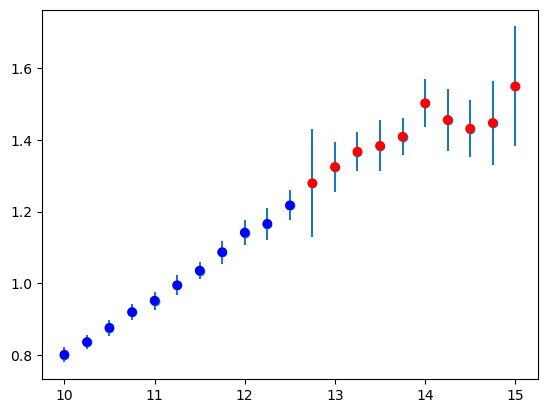

In [86]:
plt.figure()
plt.errorbar(I_list, final_std, yerr=final_std_err, fmt="o")
plt.scatter(I_list, final_std, color=["red" if final_alive[i] <= 450 else "blue" for i in range(len(final_alive))], zorder=10)

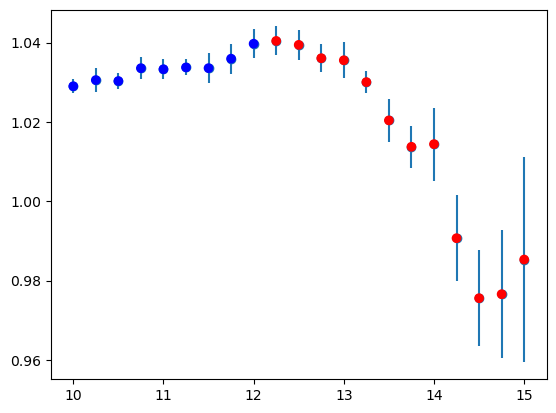

In [88]:
plt.figure()
plt.errorbar(I_list, final_mean/I_list, yerr=final_mean_err/I_list, fmt="o")
plt.scatter(I_list, final_mean/I_list, color=["red" if final_alive[i] <= 450 else "blue" for i in range(len(final_alive))], zorder=10)

1.8374778024090333e-15
1.1660283542852223
1.173265715213427


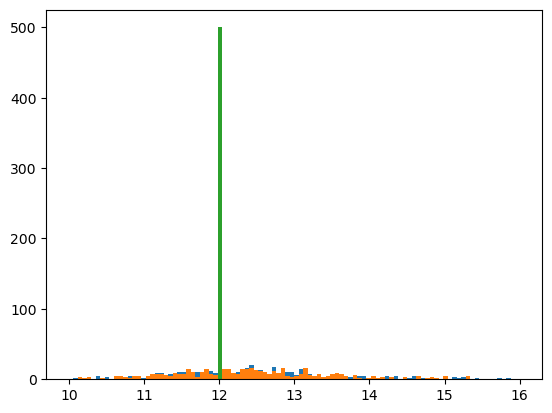

In [59]:
mask = np.isclose(amplitude0, 12, atol=1e-6)

std = np.nanstd(amplitude[:, mask], axis=1)
mean = np.nanmean(amplitude[:, mask], axis=1)
not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

plt.hist(amplitude[-1, mask], bins=100, range=(10, 16));
plt.hist(amplitude[-10, mask], bins=100, range=(10, 16));
plt.hist(amplitude0[mask], bins=100, range=(10, 16));

print(np.nanstd(amplitude0[mask]))
print(np.nanstd(amplitude[-10, mask]))
print(np.nanstd(amplitude[-1, mask]))

1.8374778024090333e-15
1.1660283542852223
1.173265715213427


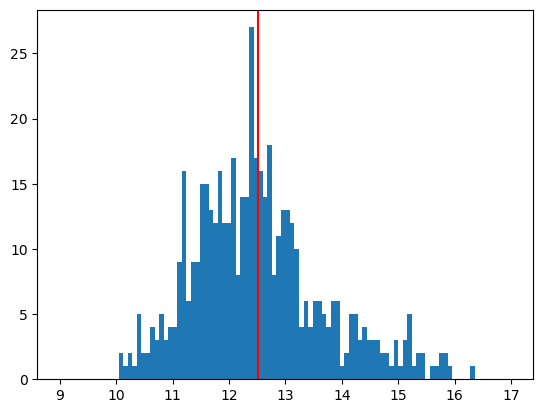

In [100]:
mask = np.isclose(amplitude0, 12, atol=1e-6)

std = np.nanstd(amplitude[:, mask], axis=1)
mean = np.nanmean(amplitude[:, mask], axis=1)
not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

plt.hist(amplitude[-1, mask], bins=100, range=(9, 17));
plt.axvline(np.mean(amplitude[-1, mask]), c="red");
# plt.hist(amplitude[-10, mask], bins=100, range=(10, 16));
# plt.hist(amplitude0[mask], bins=100, range=(10, 16));

print(np.nanstd(amplitude0[mask]))
print(np.nanstd(amplitude[-10, mask]))
print(np.nanstd(amplitude[-1, mask]))

1.8097929380118714e-15
0.8055168527659017
0.8162975758703749


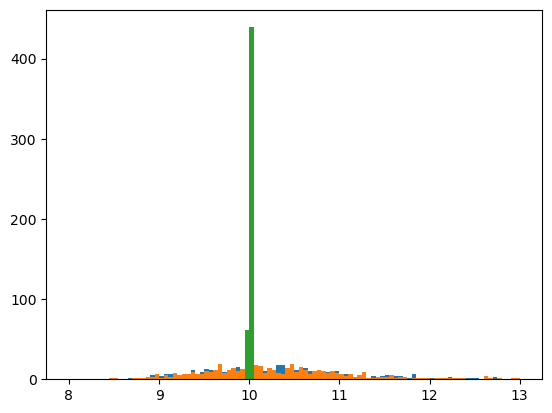

In [60]:
mask = np.isclose(amplitude0, 10, atol=1e-6)

std = np.nanstd(amplitude[:, mask], axis=1)
mean = np.nanmean(amplitude[:, mask], axis=1)
not_nan = np.count_nonzero(np.logical_not(np.isnan(amplitude[:, mask])), axis=1)

plt.hist(amplitude[-1, mask], bins=100, range=(8, 13));
plt.hist(amplitude[-10, mask], bins=100, range=(8, 13));
plt.hist(amplitude0[mask], bins=100, range=(8, 13));

print(np.nanstd(amplitude0[mask]))
print(np.nanstd(amplitude[-10, mask]))
print(np.nanstd(amplitude[-1, mask]))

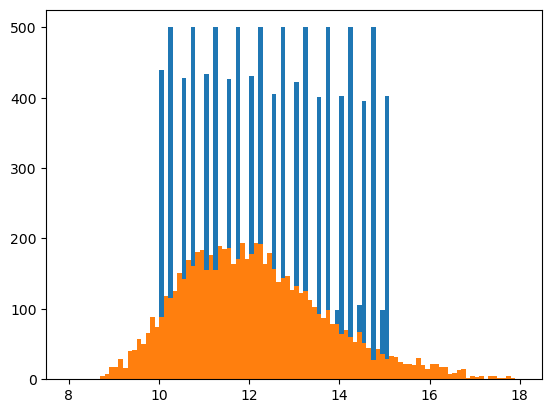

In [94]:
plt.hist(amplitude0, bins=100, range=(8, 18));
plt.hist(amplitude[-1], bins=100, range=(8, 18));